# Dense Neural Network on Urban Sounds Features

We use a 2 layer dense neural network on manually engineered sound features.

We perform a seach on the size of the layers and find that a very large network ($1024\times 256$) has the best performance
$\approx 93$%

## Preliminaries

### Imports

In [1]:
import glob
import os
import pickle

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt

import librosa


from sklearn.model_selection import train_test_split

%matplotlib inline

import sys
sys.path.append("../..")
from E4525_ML.multiclass_logistic import LogisticGDClassifier

### Load Preprocessed Features

In [2]:
features_dir="../../data/UrbanSounds"

#model_dir="../../data/models/tf/DNN_UrbanSounds"

In [3]:
filename=features_dir+"/features.p"
if False:
    features_all, labels_all = extract_features(raw_data_dir,sub_dirs)

    print(features.shape)
    file=open(filename,"wb")
    pickle.dump((features_all,labels_all),file)
else:
    file=open(filename,"rb")
    (features_all,labels_all)=pickle.load(file)

### Generate Train, Validation and Test Sets

In [4]:
features,features_test,labels,labels_test=train_test_split(features_all,labels_all,test_size=0.2)
print(features.shape,features_test.shape)

(6315, 193) (1579, 193)


In [5]:
features_train,features_val,labels_train,labels_val=train_test_split(features,labels,test_size=0.2)
print(features_train.shape,features_val.shape)

(5052, 193) (1263, 193)


# Logistic Regression

In [6]:
from E4525_ML.multiclass_logistic import LogisticGDClassifier

In [7]:
model=LogisticGDClassifier(max_iter=5000,learning_rate=0.00001,penalty=0,verbose=True)

In [8]:
model.fit(features_train.reshape(len(features_train),-1),labels_train,features_val.reshape(len(features_val),-1),labels_val)
Y_pred=model.predict(features_train.reshape(len(features_train),-1))
"Training accuracy",np.mean(Y_pred==labels_train)

	 0 Loss = 17230.500133554528 Train_Accuracy 0.101 Evaluation Loss = 17236.327498542756 Accuracy = 0.095
	 500 Loss = 1378.9783188747497 Train_Accuracy 0.728 Evaluation Loss = 2086.3886622847494 Accuracy = 0.652
	 1000 Loss = 1090.5553613416623 Train_Accuracy 0.753 Evaluation Loss = 1621.3227256111072 Accuracy = 0.717
	 1500 Loss = 1071.4710925530858 Train_Accuracy 0.728 Evaluation Loss = 1742.960867906273 Accuracy = 0.66
	 2000 Loss = 1251.4246682693833 Train_Accuracy 0.708 Evaluation Loss = 2093.626369116404 Accuracy = 0.642
	 2500 Loss = 1707.3824058997084 Train_Accuracy 0.686 Evaluation Loss = 2058.521991152697 Accuracy = 0.656
	 3000 Loss = 1227.8340993865377 Train_Accuracy 0.728 Evaluation Loss = 1608.0907181922464 Accuracy = 0.706
	 3500 Loss = 1480.126926306245 Train_Accuracy 0.708 Evaluation Loss = 1941.0545027393428 Accuracy = 0.663
	 4000 Loss = 1621.0287739350847 Train_Accuracy 0.689 Evaluation Loss = 2348.7527980251734 Accuracy = 0.646
	 4500 Loss = 1331.2192035831063 Trai

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


('Training accuracy', 0.7404988123515439)

In [9]:
Y_pred=model.predict(features_test.reshape((len(features_test),-1)))
"Test Accuracy",np.mean(Y_pred==labels_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


('Test Accuracy', 0.694110196326789)

## Training Dense Neural Network on Urban Sound Features Data Set

In [104]:
num_classes=10

In [37]:
class ReportCallback(keras.callbacks.Callback):
    def __init__(self,frequency,use_val=True):
        self.freq=frequency
        self.use_val=use_val
        self.separator=" || "
        if not(self.use_val):
            self.separator="\n"
    def on_epoch_end(self, epoch, logs={}):
        if (epoch % self.freq ==0):
            train_loss=logs["loss"]
            train_acc=logs["acc"]
            print(f"\t{epoch}: TRAIN loss {train_loss:.4f},  acc {train_acc:.4f}",end=self.separator)
            if self.use_val:
                val_loss=logs["val_loss"]
                val_acc=logs["val_acc"]
                print(f"VAL loss {val_loss:.4f}, acc {val_acc:.4f}")

In [75]:
def build_model(hidden1,hidden2):
    model=keras.Sequential([
        keras.layers.Flatten(input_shape=(193,)),
        keras.layers.Dense(hidden1,activation="relu"),
        keras.layers.Dense(hidden2,activation="relu"),
        keras.layers.Dense(num_classes,activation="softmax")
    ])
    optimizer=keras.optimizers.Adam(lr=0.001,decay=1e-4)
    model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model

In [76]:
model0=build_model(512,256)
model0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 193)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 512)               99328     
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_35 (Dense)             (None, 10)                2570      
Total params: 233,226
Trainable params: 233,226
Non-trainable params: 0
_________________________________________________________________


In [77]:
nepochs=300

In [78]:
result=model0.fit(features_train,labels_train,validation_data=(features_val,labels_val),
                  epochs=nepochs,batch_size=100,
                  verbose=0,callbacks=[ReportCallback(10)])

	0: TRAIN loss 7.7082,  acc 0.3294 || VAL loss 4.4935, acc 0.4402
	10: TRAIN loss 1.2543,  acc 0.8268 || VAL loss 1.6064, acc 0.7728
	20: TRAIN loss 0.9637,  acc 0.9082 || VAL loss 1.3789, acc 0.8353
	30: TRAIN loss 1.0119,  acc 0.9024 || VAL loss 1.4670, acc 0.8242
	40: TRAIN loss 0.8720,  acc 0.9343 || VAL loss 1.3735, acc 0.8480
	50: TRAIN loss 0.8426,  acc 0.9430 || VAL loss 1.3005, acc 0.8686
	60: TRAIN loss 0.8639,  acc 0.9353 || VAL loss 1.4006, acc 0.8535
	70: TRAIN loss 0.8953,  acc 0.9355 || VAL loss 1.3529, acc 0.8717
	80: TRAIN loss 0.8676,  acc 0.9446 || VAL loss 1.3349, acc 0.8812
	90: TRAIN loss 0.8347,  acc 0.9475 || VAL loss 1.3023, acc 0.8836
	100: TRAIN loss 0.4555,  acc 0.9238 || VAL loss 0.7997, acc 0.8749
	110: TRAIN loss 0.1863,  acc 0.9800 || VAL loss 0.6903, acc 0.9018
	120: TRAIN loss 0.1343,  acc 0.9905 || VAL loss 0.6449, acc 0.9145
	130: TRAIN loss 0.1319,  acc 0.9907 || VAL loss 0.6234, acc 0.9177
	140: TRAIN loss 0.1316,  acc 0.9903 || VAL loss 0.6178, ac

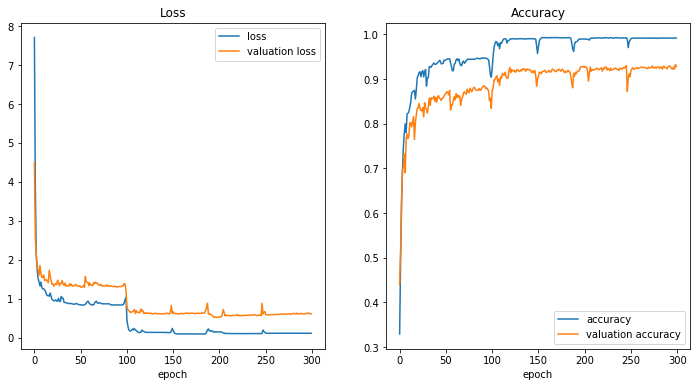

In [79]:
history=result.history
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history["loss"],label="loss")
plt.plot(history["val_loss"],label="valuation loss")
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["acc"],label="accuracy")
plt.plot(history["val_acc"],label="valuation accuracy")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()

In [81]:
Y_pred=np.argmax(model0.predict(features_val),axis=1)
np.mean(Y_pred==labels_val)

0.9287410926365796

## Hyperparameter search

Let's now search on parameter space for the optimal size of both layers.

In [82]:
results=[]
for n_layer1 in [16,32,64,128,256,2*256,4*256]:
    for n_layer2 in [16,32,64,128,256,2*256,4*256]:
        # Build the Estimator
        model=build_model(n_layer1,n_layer2)
        model.fit(features_train,labels_train,validation_data=(features_val,labels_val),
                  epochs=nepochs,batch_size=100,
                  verbose=0,callbacks=[ReportCallback(10)])
        Y_pred=np.argmax(model.predict(features_train),axis=1)
        acc_train=np.mean(Y_pred==labels_train)
        Y_pred=np.argmax(model.predict(features_val),axis=1)
        acc_val=np.mean(Y_pred==labels_val)
        print(n_layer1,n_layer2,acc_train,acc_val)
        results.append((n_layer1,n_layer2,acc_train,acc_val))
        

	0: TRAIN loss 5.7940,  acc 0.1261 || VAL loss 3.1946, acc 0.1449
	10: TRAIN loss 1.4170,  acc 0.5230 || VAL loss 1.4787, acc 0.5099
	20: TRAIN loss 1.0940,  acc 0.6243 || VAL loss 1.2365, acc 0.6160
	30: TRAIN loss 0.9605,  acc 0.6746 || VAL loss 1.1408, acc 0.6477
	40: TRAIN loss 0.8611,  acc 0.7068 || VAL loss 1.1029, acc 0.6722
	50: TRAIN loss 0.7923,  acc 0.7276 || VAL loss 1.0738, acc 0.6912
	60: TRAIN loss 0.7285,  acc 0.7530 || VAL loss 1.0477, acc 0.7023
	70: TRAIN loss 0.6936,  acc 0.7694 || VAL loss 1.0147, acc 0.7268
	80: TRAIN loss 0.6400,  acc 0.7914 || VAL loss 0.9891, acc 0.7427
	90: TRAIN loss 0.6112,  acc 0.8011 || VAL loss 0.9839, acc 0.7348
	100: TRAIN loss 0.5937,  acc 0.8007 || VAL loss 0.9708, acc 0.7530
	110: TRAIN loss 0.5573,  acc 0.8151 || VAL loss 0.9699, acc 0.7411
	120: TRAIN loss 0.5315,  acc 0.8268 || VAL loss 0.9921, acc 0.7451
	130: TRAIN loss 0.5116,  acc 0.8369 || VAL loss 0.9930, acc 0.7451
	140: TRAIN loss 0.4953,  acc 0.8411 || VAL loss 0.9943, ac

16 128 0.9853523357086302 0.836104513064133
	0: TRAIN loss 3.2002,  acc 0.2755 || VAL loss 1.8597, acc 0.4442
	10: TRAIN loss 0.8057,  acc 0.7310 || VAL loss 0.9956, acc 0.7031
	20: TRAIN loss 0.5513,  acc 0.8215 || VAL loss 0.8764, acc 0.7672
	30: TRAIN loss 0.4327,  acc 0.8577 || VAL loss 0.8208, acc 0.7870
	40: TRAIN loss 0.4253,  acc 0.8624 || VAL loss 0.8416, acc 0.7965
	50: TRAIN loss 0.2830,  acc 0.9099 || VAL loss 0.7315, acc 0.8290
	60: TRAIN loss 0.2522,  acc 0.9196 || VAL loss 0.7180, acc 0.8440
	70: TRAIN loss 0.1966,  acc 0.9408 || VAL loss 0.7195, acc 0.8401
	80: TRAIN loss 0.1659,  acc 0.9553 || VAL loss 0.7413, acc 0.8480
	90: TRAIN loss 0.1387,  acc 0.9630 || VAL loss 0.7878, acc 0.8424
	100: TRAIN loss 0.1167,  acc 0.9715 || VAL loss 0.8206, acc 0.8409
	110: TRAIN loss 0.1007,  acc 0.9759 || VAL loss 0.8107, acc 0.8496
	120: TRAIN loss 0.0825,  acc 0.9814 || VAL loss 0.8289, acc 0.8559
	130: TRAIN loss 0.0704,  acc 0.9844 || VAL loss 0.8623, acc 0.8511
	140: TRAIN los

	290: TRAIN loss 0.1032,  acc 0.9709 || VAL loss 1.0962, acc 0.8234
32 16 0.9766429136975455 0.8210609659540776
	0: TRAIN loss 6.5271,  acc 0.2225 || VAL loss 3.8969, acc 0.3167
	10: TRAIN loss 0.9141,  acc 0.7126 || VAL loss 1.1622, acc 0.6817
	20: TRAIN loss 0.6395,  acc 0.8064 || VAL loss 0.9734, acc 0.7427
	30: TRAIN loss 0.5140,  acc 0.8529 || VAL loss 0.8571, acc 0.7910
	40: TRAIN loss 0.4245,  acc 0.8798 || VAL loss 0.8379, acc 0.8060
	50: TRAIN loss 0.3593,  acc 0.8971 || VAL loss 0.8158, acc 0.8139
	60: TRAIN loss 0.3012,  acc 0.9143 || VAL loss 0.8119, acc 0.8242
	70: TRAIN loss 0.2719,  acc 0.9256 || VAL loss 0.7978, acc 0.8298
	80: TRAIN loss 0.2469,  acc 0.9281 || VAL loss 0.7690, acc 0.8361
	90: TRAIN loss 0.2123,  acc 0.9446 || VAL loss 0.7736, acc 0.8448
	100: TRAIN loss 0.1933,  acc 0.9477 || VAL loss 0.7990, acc 0.8416
	110: TRAIN loss 0.1799,  acc 0.9535 || VAL loss 0.8085, acc 0.8488
	120: TRAIN loss 0.1679,  acc 0.9578 || VAL loss 0.8608, acc 0.8385
	130: TRAIN los

	280: TRAIN loss 0.0699,  acc 0.9945 || VAL loss 1.0136, acc 0.8773
	290: TRAIN loss 0.0776,  acc 0.9921 || VAL loss 1.0883, acc 0.8646
32 256 0.9950514647664291 0.8788598574821853
	0: TRAIN loss 2.8707,  acc 0.3314 || VAL loss 1.5861, acc 0.4925
	10: TRAIN loss 0.5862,  acc 0.8238 || VAL loss 0.8257, acc 0.7688
	20: TRAIN loss 0.3346,  acc 0.9038 || VAL loss 0.6736, acc 0.8226
	30: TRAIN loss 0.3012,  acc 0.9184 || VAL loss 0.6171, acc 0.8496
	40: TRAIN loss 0.1484,  acc 0.9669 || VAL loss 0.6315, acc 0.8725
	50: TRAIN loss 0.1102,  acc 0.9802 || VAL loss 0.6183, acc 0.8789
	60: TRAIN loss 0.1066,  acc 0.9852 || VAL loss 0.6224, acc 0.8765
	70: TRAIN loss 0.0776,  acc 0.9875 || VAL loss 0.6394, acc 0.8868
	80: TRAIN loss 0.0682,  acc 0.9923 || VAL loss 0.6452, acc 0.8955
	90: TRAIN loss 0.0642,  acc 0.9919 || VAL loss 0.7795, acc 0.8646
	100: TRAIN loss 0.0890,  acc 0.9871 || VAL loss 0.7708, acc 0.8781
	110: TRAIN loss 0.0461,  acc 0.9964 || VAL loss 0.6715, acc 0.8907
	120: TRAIN lo

	270: TRAIN loss 0.0197,  acc 0.9966 || VAL loss 1.1146, acc 0.8583
	280: TRAIN loss 0.0168,  acc 0.9980 || VAL loss 1.1191, acc 0.8567
	290: TRAIN loss 0.0180,  acc 0.9974 || VAL loss 1.1463, acc 0.8543
64 32 0.998812351543943 0.8527315914489311
	0: TRAIN loss 9.5500,  acc 0.1936 || VAL loss 4.8336, acc 0.2858
	10: TRAIN loss 0.8286,  acc 0.7763 || VAL loss 1.0729, acc 0.7197
	20: TRAIN loss 0.5868,  acc 0.8664 || VAL loss 0.9197, acc 0.7910
	30: TRAIN loss 0.4655,  acc 0.8992 || VAL loss 0.8601, acc 0.8250
	40: TRAIN loss 0.4443,  acc 0.9125 || VAL loss 0.8025, acc 0.8298
	50: TRAIN loss 0.3405,  acc 0.9420 || VAL loss 0.8056, acc 0.8448
	60: TRAIN loss 0.3319,  acc 0.9434 || VAL loss 0.8128, acc 0.8496
	70: TRAIN loss 0.2726,  acc 0.9565 || VAL loss 0.7904, acc 0.8591
	80: TRAIN loss 0.2439,  acc 0.9652 || VAL loss 0.7813, acc 0.8622
	90: TRAIN loss 0.2303,  acc 0.9705 || VAL loss 0.8012, acc 0.8630
	100: TRAIN loss 0.2178,  acc 0.9749 || VAL loss 0.8204, acc 0.8678
	110: TRAIN loss

	260: TRAIN loss 0.0361,  acc 0.9962 || VAL loss 0.6681, acc 0.9074
	270: TRAIN loss 0.0353,  acc 0.9964 || VAL loss 0.6733, acc 0.9089
	280: TRAIN loss 0.0451,  acc 0.9941 || VAL loss 0.6889, acc 0.9089
	290: TRAIN loss 0.0376,  acc 0.9970 || VAL loss 0.6858, acc 0.9002
64 512 0.9974267616785432 0.9065716547901821
	0: TRAIN loss 4.4985,  acc 0.3341 || VAL loss 2.7637, acc 0.4212
	10: TRAIN loss 0.4903,  acc 0.8525 || VAL loss 0.7975, acc 0.8076
	20: TRAIN loss 0.3896,  acc 0.8967 || VAL loss 0.7564, acc 0.8290
	30: TRAIN loss 0.1188,  acc 0.9743 || VAL loss 0.5605, acc 0.8915
	40: TRAIN loss 0.0827,  acc 0.9832 || VAL loss 0.6030, acc 0.8860
	50: TRAIN loss 0.0488,  acc 0.9951 || VAL loss 0.5816, acc 0.9002
	60: TRAIN loss 0.1188,  acc 0.9772 || VAL loss 0.6115, acc 0.8884
	70: TRAIN loss 0.0877,  acc 0.9929 || VAL loss 0.5607, acc 0.9042
	80: TRAIN loss 0.1930,  acc 0.9561 || VAL loss 0.8225, acc 0.8614
	90: TRAIN loss 0.0686,  acc 0.9887 || VAL loss 0.7508, acc 0.8876
	100: TRAIN lo

	250: TRAIN loss 0.0291,  acc 0.9956 || VAL loss 0.7854, acc 0.8907
	260: TRAIN loss 0.0225,  acc 0.9972 || VAL loss 0.7731, acc 0.8899
	270: TRAIN loss 0.0406,  acc 0.9915 || VAL loss 0.8112, acc 0.8868
	280: TRAIN loss 0.0222,  acc 0.9974 || VAL loss 0.8012, acc 0.8892
	290: TRAIN loss 0.0239,  acc 0.9974 || VAL loss 0.7944, acc 0.8899
128 64 0.9974267616785432 0.8883610451306413
	0: TRAIN loss 5.0096,  acc 0.3256 || VAL loss 2.5984, acc 0.4513
	10: TRAIN loss 0.6464,  acc 0.8521 || VAL loss 0.8655, acc 0.8044
	20: TRAIN loss 0.4421,  acc 0.9078 || VAL loss 0.8903, acc 0.8139
	30: TRAIN loss 0.3875,  acc 0.9226 || VAL loss 0.8050, acc 0.8377
	40: TRAIN loss 0.2898,  acc 0.9580 || VAL loss 0.7360, acc 0.8717
	50: TRAIN loss 0.2486,  acc 0.9673 || VAL loss 0.7095, acc 0.8828
	60: TRAIN loss 0.2365,  acc 0.9707 || VAL loss 0.7122, acc 0.8860
	70: TRAIN loss 0.2446,  acc 0.9673 || VAL loss 0.7269, acc 0.8797
	80: TRAIN loss 0.2003,  acc 0.9818 || VAL loss 0.7520, acc 0.8828
	90: TRAIN lo

	240: TRAIN loss 0.1844,  acc 0.9871 || VAL loss 0.8108, acc 0.9074
	250: TRAIN loss 0.1844,  acc 0.9869 || VAL loss 0.7872, acc 0.9074
	260: TRAIN loss 0.1839,  acc 0.9873 || VAL loss 0.7967, acc 0.9097
	270: TRAIN loss 0.1901,  acc 0.9852 || VAL loss 0.8162, acc 0.9010
	280: TRAIN loss 0.1391,  acc 0.9901 || VAL loss 0.7794, acc 0.9050
	290: TRAIN loss 0.1359,  acc 0.9905 || VAL loss 0.7713, acc 0.9082
128 1024 0.9910926365795725 0.9113222486144101
	0: TRAIN loss 4.2888,  acc 0.1639 || VAL loss 2.2025, acc 0.2059
	10: TRAIN loss 0.9640,  acc 0.6514 || VAL loss 1.1402, acc 0.6477
	20: TRAIN loss 0.5081,  acc 0.8280 || VAL loss 0.9179, acc 0.7625
	30: TRAIN loss 0.3317,  acc 0.8973 || VAL loss 0.7085, acc 0.8290
	40: TRAIN loss 0.2375,  acc 0.9299 || VAL loss 0.6385, acc 0.8527
	50: TRAIN loss 0.1442,  acc 0.9549 || VAL loss 0.6547, acc 0.8472
	60: TRAIN loss 0.1093,  acc 0.9683 || VAL loss 0.6867, acc 0.8622
	70: TRAIN loss 0.1118,  acc 0.9658 || VAL loss 0.7007, acc 0.8614
	80: TRAIN

	230: TRAIN loss 0.0498,  acc 0.9954 || VAL loss 0.6277, acc 0.9145
	240: TRAIN loss 0.0711,  acc 0.9897 || VAL loss 0.7124, acc 0.8947
	250: TRAIN loss 0.0377,  acc 0.9968 || VAL loss 0.6299, acc 0.9105
	260: TRAIN loss 0.0375,  acc 0.9970 || VAL loss 0.6296, acc 0.9137
	270: TRAIN loss 0.0388,  acc 0.9960 || VAL loss 0.6385, acc 0.9153
	280: TRAIN loss 0.0380,  acc 0.9964 || VAL loss 0.6351, acc 0.9169
	290: TRAIN loss 0.0381,  acc 0.9964 || VAL loss 0.6229, acc 0.9177
256 128 0.9970308788598575 0.9136975455265242
	0: TRAIN loss 7.1867,  acc 0.3179 || VAL loss 3.6688, acc 0.4774
	10: TRAIN loss 0.4322,  acc 0.8822 || VAL loss 0.6955, acc 0.8337
	20: TRAIN loss 0.2792,  acc 0.9347 || VAL loss 0.6723, acc 0.8638
	30: TRAIN loss 0.2388,  acc 0.9487 || VAL loss 0.6765, acc 0.8741
	40: TRAIN loss 0.1240,  acc 0.9834 || VAL loss 0.5363, acc 0.9082
	50: TRAIN loss 0.1212,  acc 0.9840 || VAL loss 0.5997, acc 0.8907
	60: TRAIN loss 0.1313,  acc 0.9798 || VAL loss 0.6010, acc 0.8963
	70: TRAIN

	220: TRAIN loss 0.0218,  acc 0.9966 || VAL loss 0.7652, acc 0.9018
	230: TRAIN loss 0.0362,  acc 0.9923 || VAL loss 0.8422, acc 0.8836
	240: TRAIN loss 0.0273,  acc 0.9943 || VAL loss 0.7810, acc 0.9058
	250: TRAIN loss 0.0195,  acc 0.9964 || VAL loss 0.8050, acc 0.8994
	260: TRAIN loss 0.0170,  acc 0.9972 || VAL loss 0.7987, acc 0.9026
	270: TRAIN loss 0.0166,  acc 0.9974 || VAL loss 0.7795, acc 0.9034
	280: TRAIN loss 0.0166,  acc 0.9970 || VAL loss 0.7846, acc 0.9034
	290: TRAIN loss 0.0467,  acc 0.9947 || VAL loss 0.8283, acc 0.9034
512 16 0.9974267616785432 0.8986539984164688
	0: TRAIN loss 3.7928,  acc 0.3561 || VAL loss 1.6486, acc 0.5099
	10: TRAIN loss 0.5021,  acc 0.8537 || VAL loss 0.7466, acc 0.8124
	20: TRAIN loss 0.3494,  acc 0.9022 || VAL loss 0.6913, acc 0.8440
	30: TRAIN loss 0.2334,  acc 0.9410 || VAL loss 0.6042, acc 0.8741
	40: TRAIN loss 0.1179,  acc 0.9727 || VAL loss 0.5443, acc 0.8899
	50: TRAIN loss 0.1136,  acc 0.9768 || VAL loss 0.5719, acc 0.8931
	60: TRAIN

	210: TRAIN loss 0.0511,  acc 0.9954 || VAL loss 0.5631, acc 0.9335
	220: TRAIN loss 0.0521,  acc 0.9954 || VAL loss 0.5820, acc 0.9327
	230: TRAIN loss 0.0524,  acc 0.9949 || VAL loss 0.5833, acc 0.9295
	240: TRAIN loss 0.0518,  acc 0.9952 || VAL loss 0.6204, acc 0.9216
	250: TRAIN loss 0.0507,  acc 0.9958 || VAL loss 0.5847, acc 0.9248
	260: TRAIN loss 0.0500,  acc 0.9958 || VAL loss 0.5874, acc 0.9232
	270: TRAIN loss 0.0498,  acc 0.9962 || VAL loss 0.6061, acc 0.9248
	280: TRAIN loss 0.0504,  acc 0.9954 || VAL loss 0.5992, acc 0.9232
	290: TRAIN loss 0.0501,  acc 0.9960 || VAL loss 0.6126, acc 0.9232
512 256 0.9962391132224862 0.9247822644497229
	0: TRAIN loss 7.3812,  acc 0.3385 || VAL loss 5.5105, acc 0.3880
	10: TRAIN loss 1.1158,  acc 0.8563 || VAL loss 1.4142, acc 0.8005
	20: TRAIN loss 1.0553,  acc 0.8941 || VAL loss 1.3648, acc 0.8211
	30: TRAIN loss 0.8654,  acc 0.9305 || VAL loss 1.3045, acc 0.8496
	40: TRAIN loss 0.8225,  acc 0.9452 || VAL loss 1.2558, acc 0.8662
	50: TRA

	200: TRAIN loss 0.0244,  acc 0.9962 || VAL loss 0.6309, acc 0.9177
	210: TRAIN loss 0.0237,  acc 0.9958 || VAL loss 0.6223, acc 0.9184
	220: TRAIN loss 0.0246,  acc 0.9960 || VAL loss 0.6475, acc 0.9169
	230: TRAIN loss 0.0378,  acc 0.9907 || VAL loss 0.7485, acc 0.8994
	240: TRAIN loss 0.0295,  acc 0.9949 || VAL loss 0.6849, acc 0.9113
	250: TRAIN loss 0.0254,  acc 0.9956 || VAL loss 0.6764, acc 0.9145
	260: TRAIN loss 0.0204,  acc 0.9966 || VAL loss 0.6802, acc 0.9153
	270: TRAIN loss 0.0217,  acc 0.9960 || VAL loss 0.7020, acc 0.9121
	280: TRAIN loss 0.0204,  acc 0.9968 || VAL loss 0.6794, acc 0.9208
	290: TRAIN loss 0.0195,  acc 0.9960 || VAL loss 0.6879, acc 0.9208
1024 32 0.9958432304038005 0.9089469517022961
	0: TRAIN loss 6.2973,  acc 0.3418 || VAL loss 3.9219, acc 0.4561
	10: TRAIN loss 0.4223,  acc 0.8862 || VAL loss 0.7496, acc 0.8337
	20: TRAIN loss 0.2947,  acc 0.9242 || VAL loss 0.6926, acc 0.8551
	30: TRAIN loss 0.2001,  acc 0.9561 || VAL loss 0.5908, acc 0.8804
	40: TR

	190: TRAIN loss 0.1358,  acc 0.9848 || VAL loss 0.5936, acc 0.9153
	200: TRAIN loss 0.0698,  acc 0.9947 || VAL loss 0.5427, acc 0.9311
	210: TRAIN loss 0.0696,  acc 0.9941 || VAL loss 0.5569, acc 0.9335
	220: TRAIN loss 0.0695,  acc 0.9947 || VAL loss 0.5581, acc 0.9311
	230: TRAIN loss 0.1386,  acc 0.9869 || VAL loss 0.6688, acc 0.9145
	240: TRAIN loss 0.1237,  acc 0.9915 || VAL loss 0.6245, acc 0.9264
	250: TRAIN loss 0.1236,  acc 0.9907 || VAL loss 0.6303, acc 0.9256
	260: TRAIN loss 0.1235,  acc 0.9913 || VAL loss 0.6336, acc 0.9272
	270: TRAIN loss 0.1242,  acc 0.9905 || VAL loss 0.6283, acc 0.9256
	280: TRAIN loss 0.1235,  acc 0.9907 || VAL loss 0.6339, acc 0.9256
	290: TRAIN loss 0.1243,  acc 0.9850 || VAL loss 0.7558, acc 0.9105
1024 512 0.9956452889944576 0.9279493269992082
	0: TRAIN loss 11.2469,  acc 0.2520 || VAL loss 11.4968, acc 0.2581
	10: TRAIN loss 0.5381,  acc 0.9080 || VAL loss 0.8312, acc 0.8464
	20: TRAIN loss 0.2277,  acc 0.9757 || VAL loss 0.6101, acc 0.8994
	30

In [85]:
data=pd.DataFrame(results,columns=["layer1","layer2","train","valuation"])
data.head()

,layer1,layer2,train,valuation
0,16,16,0.884600,0.762470
1,16,32,0.923199,0.806017
2,16,64,0.967538,0.813143
3,16,128,0.985352,0.836105
4,16,256,0.998416,0.857482


In [88]:
data.to_csv(data_dir+"/DNN_layer_accuracy.csv")

NameError: name 'data_dir' is not defined

In [89]:
val_error=data[["layer1","layer2","valuation"]]

In [90]:
val_error.head()

,layer1,layer2,valuation
0,16,16,0.762470
1,16,32,0.806017
2,16,64,0.813143
3,16,128,0.836105
4,16,256,0.857482


In [91]:
pivot=val_error.pivot('layer1', 'layer2')

In [92]:
pivot

valuation                                                            
layer2      16        32        64        128       256       512       1024
layer1                                                                      
16      0.762470  0.806017  0.813143  0.836105  0.857482  0.842439  0.878068
32      0.821061  0.843230  0.851940  0.833729  0.878860  0.901821  0.900238
64      0.843230  0.852732  0.878860  0.889153  0.910530  0.906572  0.901821
128     0.856690  0.897070  0.888361  0.898654  0.915281  0.905780  0.911322
256     0.893112  0.904196  0.908155  0.913698  0.919240  0.916865  0.926366
512     0.898654  0.908155  0.918448  0.927158  0.924782  0.923990  0.894695
1024    0.889945  0.908947  0.923199  0.927949  0.933492  0.927949  0.931116

Basically, the larger the size of the two layers, the better the **generalization** error.


In [93]:
from matplotlib import colors, ticker, cm

In [94]:
X=pivot.columns.levels[1].values
Y=pivot.index.values
Z=val_error["valuation"].values.reshape(len(X),-1)
print(X.shape,Y.shape,Z.shape)
Xi,Yi = np.meshgrid(X, Y)

(7,) (7,) (7, 7)


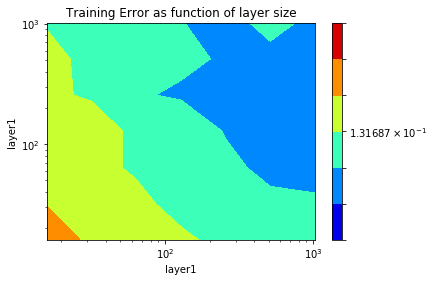

In [95]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("Training Error as function of layer size")
ax.set_xlabel("layer1")
ax.set_ylabel("layer1")
ax.set_xscale("log")
ax.set_yscale("log")
cs=plt.contourf(Yi, Xi, 1-Z,locator=ticker.LogLocator(base=1.5,numdecs=10),  cmap=plt.cm.jet)
cbar = fig.colorbar(cs)

In [103]:
best_idx=val_error["valuation"].idxmax()
best=val_error.iloc[best_idx]
best_hidden1,best_hidden2,err=best
best_hidden1,best_hidden2,err

(1024.0, 256.0, 0.9334916864608076)

It seems we need a large layer 1, layer 2 can be a bit smaller (error has less slope)

The best model is **very large**, it has:

In [119]:
layer1_params=best_hidden1*(193+1)
layer2_params=best_hidden2*(best_hidden1+1)
output_params=  num_classes*(best_hidden2+1)
total_params=layer1_params+layer2_params+output_params
print(f"Parameters in layer1 {layer1_params:6,.0f}")
print(f"Parameters in layer2 {layer2_params:6,.0f}",)
print(f"Parameters in output layer {output_params:6,.0f}")
print(f"Total Parameters {total_params:6,.0f}",)

Parameters in layer1 198,656
Parameters in layer2 262,400
Parameters in output layer  2,570
Total Parameters 463,626


## A 3 layer network does no better

In [122]:
def build_3layer_model(hidden1,hidden2,hidden3):
    model=keras.Sequential([
        keras.layers.Flatten(input_shape=(193,)),
        keras.layers.Dense(hidden1,activation="relu"),
        keras.layers.Dense(hidden2,activation="relu"),
        keras.layers.Dense(hidden3,activation="relu"),
        keras.layers.Dense(num_classes,activation="softmax")
    ])
    optimizer=keras.optimizers.Adam(lr=0.001,decay=1e-4)
    model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model

In [123]:
hidden1=512
hidden2=256
hidden3=256
model3=build_3layer_model(hidden1,hidden2,hidden3)

In [124]:
result3=model3.fit(features_train,labels_train,validation_data=(features_val,labels_val),
                  epochs=nepochs,batch_size=100,
                  verbose=0,callbacks=[ReportCallback(10)])

	0: TRAIN loss 5.3737,  acc 0.3468 || VAL loss 3.3855, acc 0.4719
	10: TRAIN loss 0.3714,  acc 0.8994 || VAL loss 0.6325, acc 0.8496
	20: TRAIN loss 0.1595,  acc 0.9610 || VAL loss 0.5138, acc 0.8971
	30: TRAIN loss 0.2952,  acc 0.9337 || VAL loss 0.5994, acc 0.8820
	40: TRAIN loss 0.1366,  acc 0.9774 || VAL loss 0.6178, acc 0.8907
	50: TRAIN loss 0.0839,  acc 0.9919 || VAL loss 0.5795, acc 0.9074
	60: TRAIN loss 0.0781,  acc 0.9937 || VAL loss 0.5595, acc 0.9169
	70: TRAIN loss 0.0776,  acc 0.9935 || VAL loss 0.5846, acc 0.9177
	80: TRAIN loss 0.1160,  acc 0.9808 || VAL loss 0.5904, acc 0.9082
	90: TRAIN loss 0.0637,  acc 0.9949 || VAL loss 0.5899, acc 0.9216
	100: TRAIN loss 0.1085,  acc 0.9808 || VAL loss 0.7089, acc 0.8947
	110: TRAIN loss 0.0560,  acc 0.9949 || VAL loss 0.5624, acc 0.9279
	120: TRAIN loss 0.0556,  acc 0.9949 || VAL loss 0.5782, acc 0.9264
	130: TRAIN loss 0.0550,  acc 0.9951 || VAL loss 0.6050, acc 0.9216
	140: TRAIN loss 0.0546,  acc 0.9954 || VAL loss 0.6137, ac

In [125]:
Y_pred=np.argmax(model0.predict(features_val),axis=1)
np.mean(Y_pred==labels_val)

0.9287410926365796

## Test Best Model

We train the best model with  all the data and measure performance on test set

In [126]:
best_hidden1,best_hidden2

(1024.0, 256.0)

In [127]:
best_model=build_model(best_hidden1,best_hidden2)
best_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_63 (Flatten)         (None, 193)               0         
_________________________________________________________________
dense_191 (Dense)            (None, 1024)              198656    
_________________________________________________________________
dense_192 (Dense)            (None, 256)               262400    
_________________________________________________________________
dense_193 (Dense)            (None, 10)                2570      
Total params: 463,626
Trainable params: 463,626
Non-trainable params: 0
_________________________________________________________________


In [128]:
best_result=best_model.fit(features,labels,validation_data=(features_test,labels_test),
                  epochs=nepochs,batch_size=100,
                  verbose=0,callbacks=[ReportCallback(10)])

	0: TRAIN loss 9.1110,  acc 0.2993 || VAL loss 8.5492, acc 0.3496
	10: TRAIN loss 0.4708,  acc 0.8925 || VAL loss 0.6291, acc 0.8588
	20: TRAIN loss 0.2354,  acc 0.9515 || VAL loss 0.4884, acc 0.8968
	30: TRAIN loss 0.1137,  acc 0.9846 || VAL loss 0.4144, acc 0.9259
	40: TRAIN loss 0.1634,  acc 0.9693 || VAL loss 0.5733, acc 0.8911
	50: TRAIN loss 0.0860,  acc 0.9856 || VAL loss 0.4574, acc 0.9208
	60: TRAIN loss 0.0847,  acc 0.9905 || VAL loss 0.5318, acc 0.9234
	70: TRAIN loss 0.0455,  acc 0.9952 || VAL loss 0.3879, acc 0.9392
	80: TRAIN loss 0.0441,  acc 0.9956 || VAL loss 0.4055, acc 0.9373
	90: TRAIN loss 0.0440,  acc 0.9951 || VAL loss 0.4183, acc 0.9379
	100: TRAIN loss 0.0434,  acc 0.9959 || VAL loss 0.4403, acc 0.9360
	110: TRAIN loss 0.1511,  acc 0.9832 || VAL loss 0.6153, acc 0.9151
	120: TRAIN loss 0.1306,  acc 0.9875 || VAL loss 0.5009, acc 0.9297
	130: TRAIN loss 0.1080,  acc 0.9914 || VAL loss 0.4900, acc 0.9367
	140: TRAIN loss 0.0505,  acc 0.9948 || VAL loss 0.4385, ac

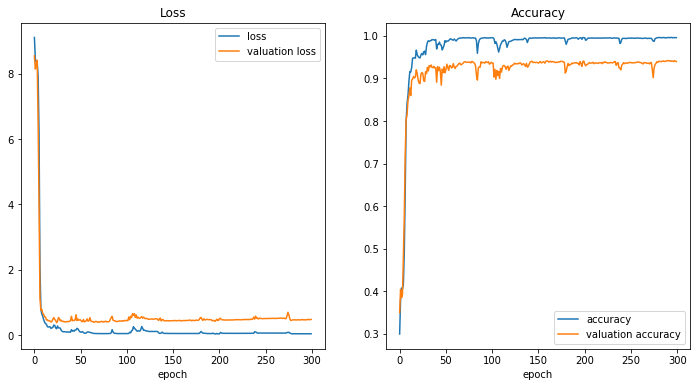

In [129]:
history=best_result.history
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history["loss"],label="loss")
plt.plot(history["val_loss"],label="valuation loss")
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["acc"],label="accuracy")
plt.plot(history["val_acc"],label="valuation accuracy")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()

In [130]:
Y_pred=np.argmax(best_model.predict(features_test),axis=1)
np.mean(Y_pred==labels_test)

0.9398353388220393

We have achieved nearly **94%** out of sample accuracy